In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("./data/linear_reg.csv")
df

,step,distance
0,0,0.000000
1,1,1.313448
2,2,2.711161
3,3,2.683138
4,4,3.110336
5,5,5.004071
6,6,5.913606
7,7,6.658234
8,8,8.377420
9,9,9.647850


The slope between two points on a linear model:
```python
slope = (y2 - y1) / (x2 - x1)
```
So between (0,0) and (2,3) -> 3/2 = 1.5

The intercept is the y value for the point where x=0

To easily make a plot with measured data and predicted data:

In [9]:
def plot_measured_vs_model(x, y, model_y):
    fig, axis = plt.subplots()
    axis.plot(x, y, linestyle=" ", marker="o", color="black", label="Measured")
    axis.plot(x, model_y, linestyle="-", marker=None, color="red", label="Modeled")
    
    axis.grid(True)
    axis.legend(loc="best")
    plt.show()

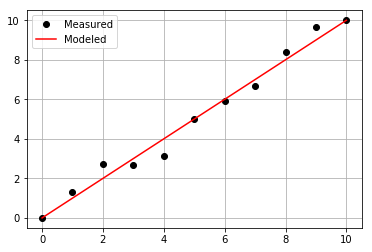

In [24]:
plot_measured_vs_model(df.step, df.distance, df.step)

### A few terms
**Deviation or centering**
For any point the deviation is the point - the mean of all points. (This is an array)

**Variance**
This is the mean of the square of the deviation. We take the square, because when taking the mean of the original values, values below zero will make the value to to zero.

**Standard deviation**
Because the variance is not in the same order as the values it's calculated from, we take the square root of it to get back to the original size order. 

**Covariance**
To see if two values are linked.
Get the deviation of both values/arrays and multiply these. Take the mean of all the values. If it is towards +, then both change in the same direction, if - they change in inverse directions. Around 0 they are not linked together.

**Correlation**
Same as covariance, but before multiplying the two arrays, divide them by their respective standard deviations. This gives a value between -1 and 1. 

To calculate correlation:

In [16]:
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

In [27]:
correlation(df.step, df.distance)

0.9905295363943742

### Taylor series

A Taylor series is a model of the form: y = a0 + (a1 * x) + (a2 * x^2) + (a3 * x^3) + .. + (an * x^n)
a0 is the intersect
a1 is the slope

### RSS - Residuals Squared Sum

RSS is a way to check how close the model we generated is to the real data. 
To do this we take the difference per point on the x-axis and square (y_model - y_data). We then sum all of these values and the smaller this value is, the better. RSS is for building models, not to evaluate them. It gives us a value that tells us which parameters are the best for this data.
```python
residuals_squared = np.square(y_model - y_data)
RSS = np.sum(residuals_squared)
```

In [31]:
# function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(xd, yd, model, a0, a1):    
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    plot_measured_vs_model(xd, yd, ym)
    return rss, summary

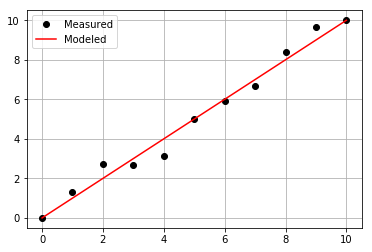

(2.1823427597621405, 'Parameters a0=0, a1=1 yield RSS=2.18')

In [33]:
def model_func(x, a0, a1):
    return a0 + (a1*x)

compute_rss_and_plot_fit(df.step, df.distance, model_func, 0 , 1)

To find a0 and a1, you can set a0 to the y-value of the data at x = 0, and then play with a1 until you find the slope that has the lowest RSS value.

### Least squares optimization

a_1 = covariance(x, y) / variance(x) 

a_0 = mean(y) - a_1 *  mean(x) 

There are several ways to get the best a1 and a0:

#### Numpy expressions of optimal slope and intercept

In [37]:
x = df.step
y = df.distance
x_mean = np.sum(x)/len(x)
y_mean = np.sum(y)/len(y)
x_dev = x - x_mean
y_dev = y - y_mean
a1 = np.sum( x_dev * y_dev ) / np.sum( x_dev**2 )
a0 = y_mean - (a1*x_mean)
print("Parameters a0={}, a1={}".format(a0, a1))

Parameters a0=-0.011423708364744378, a1=1.0099077093228683


#### Optimized by Scipy

In [43]:
from scipy import optimize
x = df.step
y = df.distance

param_opt, param_cov = optimize.curve_fit(model_func, x, y)
a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x
print("Parameters a0={}, a1={}".format(a0, a1))

Parameters a0=-0.011423708366951724, a1=1.00990770932289


#### Optimized by Statsmodels

See lower for how to use ols

In [44]:
from statsmodels.formula.api import ols
x = df.step
y = df.distance

df = pd.DataFrame(dict(x_name=x, y_name=y))
model_fit = ols(formula="y_name ~ x_name", data=df).fit()
y_model = model_fit.predict(df)
x_model = x

#get intercept and slope
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_name']
#get the standard errors
e0 = model_fit.params['Intercept']  #uncertainty in intercept
e1 = model_fit.params['x_name']     #uncertainty in slope

print("Parameters a0={}, a1={}".format(a0, a1))


Parameters a0=-0.011423708364746488, a1=1.0099077093228688


All three manners return the same value several digits after the decimal point.

## Linear regression

In [37]:
from sklearn.linear_model import LinearRegression

# Initialize a general model
model = LinearRegression(fit_intercept=True)

# x/y_data.shape = (len,) but we need it to be (len, 1)
x_data = df.step.values.reshape(-1, 1)
y_data = df.distance.values.reshape(-1, 1)

 # Fit the model to the data
model.fit(x_data, y_data)

# Extract the linear model parameters
intercept = model.intercept_[0]
slope = model.coef_[0,0]

# Use the model to make predictions
future_x = 15
future_y = model.predict([[future_x]])

print ("Based on the model, the prediction for x-value {} is {}".format(future_x, future_y))


Based on the model, the prediction for x-value 15 is [[15.13719193]]


Model.predict expects an array of arrays, so the value passed to it needs to be of the for [[value1],[value2],[value3],... [valueN]]

### OLS

Ols allows us to generate a model for data we have. In the example we pass in a DataFrame and tell the model which columns to use to create a model. This will return the intercept and the slope.

In [110]:
from statsmodels.formula.api import ols

#df2 = pd.DataFrame({"step":df.step.values , "distance":df.distance.values})

model_fit = ols(formula="distance ~ step", data=df).fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['step']

# Extract the standard errors
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['step']

# Print model parameter values with meaningful names, and compare to summary()
print( "Intercept = {:0.4f}".format(a0) )
print( "Slope = {:0.4f}".format(a1) )
#print( model_fit.summary() )

predictions_for_existing_data=model_fit.predict()
print("prediction for existing data:")
print('-----------------------------')
print (predictions_for_existing_data)

#Prediction for existing and new data, this must be passed as a DataSet column
raw_data = {'step': [2, 5, 15, 20]}
newData = pd.DataFrame(raw_data, columns = ['step'])

predictions_for_new_data=model_fit.predict(newData)
print("prediction for new data:")
print('------------------------')
print(predictions_for_new_data)


Intercept = -0.0114
Slope = 1.0099
prediction for existing data:
-----------------------------
[-0.01142371  0.998484    2.00839171  3.01829942  4.02820713  5.03811484
  6.04802255  7.05793026  8.06783797  9.07774568 10.08765338]
prediction for new data:
------------------------
0     2.008392
1     5.038115
2    15.137192
3    20.186730
dtype: float64


### evaluating the goodness of fit of a model

#### RMSE

RMSE provides a measure about how much the model deviates from the data.

```python
residuals = y_model - y_data

RSS = np.sum( np.square(residuals) )

MSE = RSS/len(residuals)
    or
MSE = np.mean(np.square(residuals))

RMSE = np.sqrt(np.mean( np.square(residuals)))
```

#### R-Squared

R-squared tells us how much of the variation is due to the linear trend and how much is not.

Deviations:
```python
deviations = np.mean(y_data) - y_data
VAR = np.sum(np.square(deviations))
```
Residuals:
```python
residuals = y_model - y_data
RSS = np.sum(np.square(residuals))
```
R-squared:
```python
r_squared = 1 - (RSS / VAR)
r = correlation(y_data, y_model)
```

You can also get the RSquared from the ols model: modelname.rsquared()

**RMSE vs R-Squared**

RMSE: how much variation is residual

R-squared: what fraction of variation is linear